<a href="https://colab.research.google.com/github/filipoky/my_hw_ds_projects/blob/main/Hw2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Налаштування відображення всіх рядків і колонок
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# URL сторінки
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Зчитування всіх таблиць
tables = pd.read_html(url)

# Знайдемо потрібну таблицю за ключовим словом
keyword = "1950"
found = None

for idx, table in enumerate(tables):
    columns = [str(col) for col in table.columns]
    if any(keyword in col for col in columns):
        print(f"Знайдено таблицю з індексом №{idx}")
        print(table)  # Вся таблиця
        found = table
        break

if found is None:
    print("Таблиця не знайдена.")
else:
    df = found.copy()  # Працюємо далі з копією

    # Ділимо лише числові значення на 10
for col in df.columns[1:]:
    df[col] = df[col].apply(
        lambda x: float(x)/10 if not pd.isna(pd.to_numeric(x, errors='coerce')) else x
    )
print("\n Вся таблиця після корегування (з вірними коефіцієнтами як на сайті):")
print(df)




Знайдено таблицю з індексом №13
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126    —    —
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82    —
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51    —
12          Львівська  234.0  240.0  171.0   

In [11]:
print("Перші рядки таблиці:")
print(df.head())  # або df.head(10)

Перші рядки таблиці:
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [12]:
print("Форма таблиці (рядки, стовпці):", df.shape)

Форма таблиці (рядки, стовпці): (28, 9)


In [15]:
df.replace('—', np.nan, inplace=True)
print("\n Після заміни '—' на NaN (Вигляд зверху):")
print(df.head())
print("\n Вигляд знизу таблиці:")
print(df.tail())


 Після заміни '—' на NaN (Вигляд зверху):
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN

 Вигляд знизу таблиці:
          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN
27       Україна  22.8  20.5  15.2  12.6   7.8  11.4  11.1   8.1


In [16]:
print("\n Типи колонок:")
print(df.dtypes)


 Типи колонок:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [17]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n Після приведення до числових типів:")
print(df.dtypes)


 Після приведення до числових типів:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [18]:
print("\n Частка пропусків по колонках:")
print(df.isnull().sum() / len(df))


 Частка пропусків по колонках:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [19]:
df = df.iloc[:-1, :]  # відкидаємо останній рядок
print("\n Видалено останній рядок (вся країна).")
print(df.tail())  # перевіримо кінець таблиці


 Видалено останній рядок (вся країна).
          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
22     Черкаська  20.5  17.9  14.4  12.3   7.5  10.0   9.8   6.4
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


In [21]:
# Заповнити пропуски середніми значеннями
df.fillna(df.mean(numeric_only=True), inplace=True)

# Округлення до 2 знаків після коми
for col in df.columns[1:]:
    df[col] = df[col].round(2)

print("\n Пропуски заповнені середніми значеннями та округлені до 2 знаків:")
print(df)


 Пропуски заповнені середніми значеннями та округлені до 2 знаків:
               Регіон  1950   1960  1970  1990  2000  2012   2014   2019
0                Крим  23.0  20.60  16.0  13.0   7.3  12.6  11.14   8.02
1           Вінницька  22.4  19.20  14.2  12.4   8.4  11.2  10.90   7.60
2           Волинська  24.7  25.00  17.9  15.3  11.2  14.8  14.10  10.10
3    Дніпропетровська  20.4  20.40  15.1  12.3   7.1  11.2  11.10   7.10
4            Донецька  27.1  21.40  14.0  10.9   6.1   9.8   8.20   8.02
5         Житомирська  26.1  22.30  15.9  12.9   8.9  12.2  12.00   7.90
6        Закарпатська  31.4  27.30  20.7  16.8  11.5  15.1  14.60  10.40
7          Запорізька  21.9  19.70  15.0  12.4   7.1  10.6  10.60   6.80
8   Івано-Франківська  24.3  24.80  18.2  15.5  10.3  12.4  12.20   8.80
9            Київська  20.4  18.90  15.6  12.3   7.3  12.2  12.10   8.00
10     Кіровоградська  21.6  17.10  14.5  12.6   7.9  11.0  10.80   6.80
11          Луганська  26.2  23.50  14.4  11.6   6.2   9

In [22]:
mean_2019 = df['2019'].mean()
higher_2019 = df[df['2019'] > mean_2019]

print("\n Регіони з народжуваністю у 2019 > середньої:")
print(higher_2019.iloc[:, 0].tolist())  # назви регіонів


 Регіони з народжуваністю у 2019 > середньої:
['Крим', 'Волинська', 'Донецька', 'Закарпатська', 'Івано-Франківська', 'Луганська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ', 'Севастополь']


In [23]:
max_region_2014 = df.loc[df['2014'].idxmax(), df.columns[0]]
print(f"\n Найвища народжуваність у 2014 була в: {max_region_2014}")


 Найвища народжуваність у 2014 була в: Рівненська


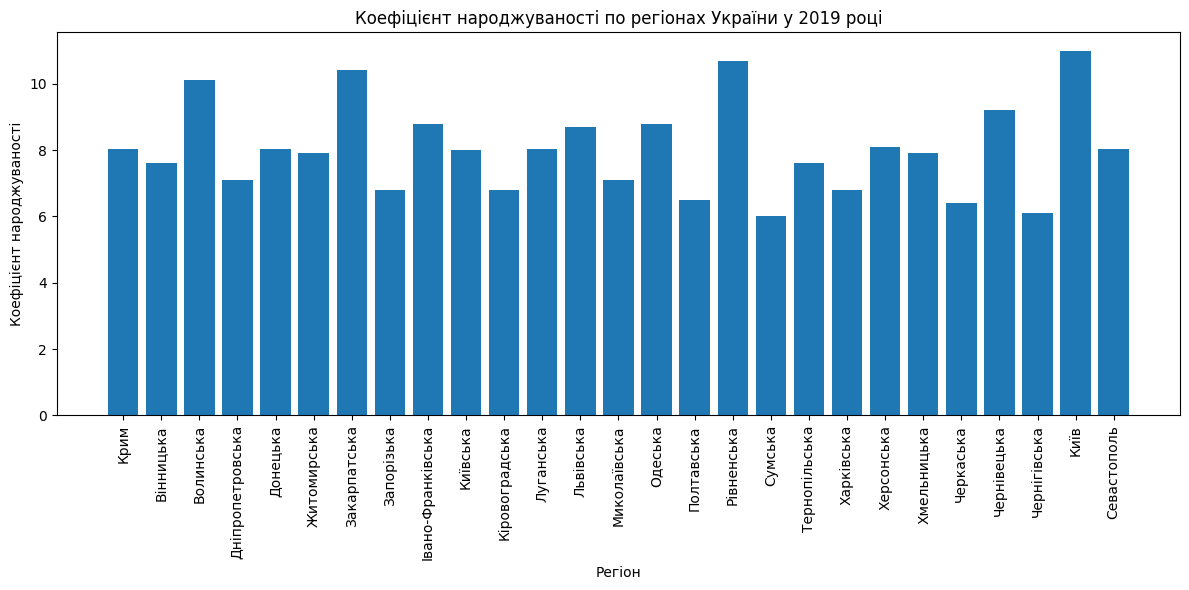

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(df.iloc[:, 0], df['2019'])
plt.xticks(rotation=90)
plt.xlabel("Регіон")
plt.ylabel("Коефіцієнт народжуваності")
plt.title("Коефіцієнт народжуваності по регіонах України у 2019 році")
plt.tight_layout()
plt.show()

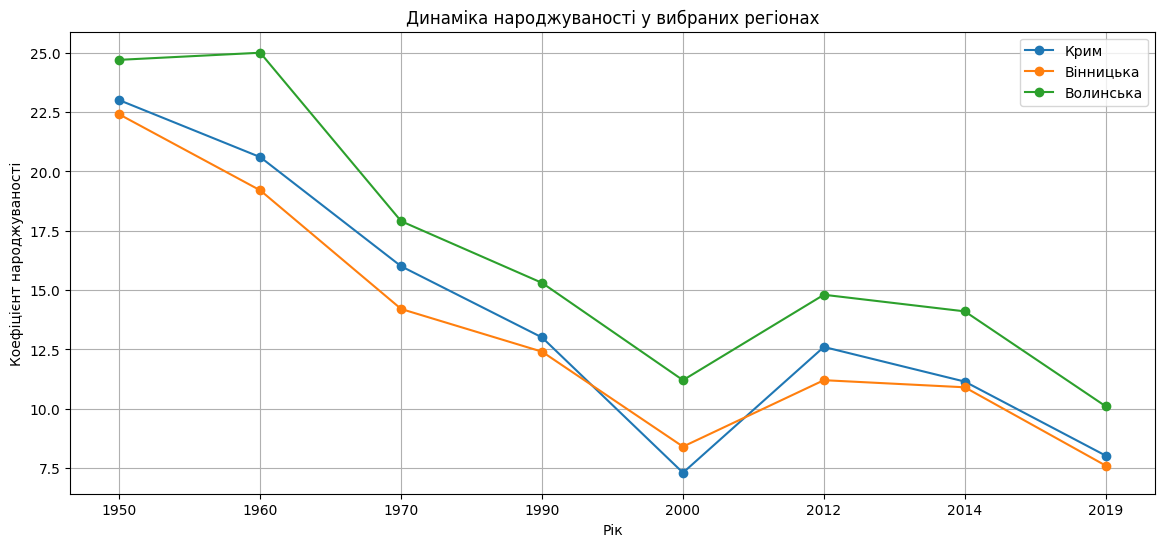

In [26]:
plt.figure(figsize=(14, 6))
years = [col for col in df.columns if col not in [df.columns[0]]]

# Для прикладу покажемо 3 регіони
for region in df.iloc[:3, :].itertuples(index=False):
    plt.plot(years, region[1:], marker='o', label=region[0])

plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.title("Динаміка народжуваності у вибраних регіонах")
plt.legend()
plt.grid(True)
plt.show()


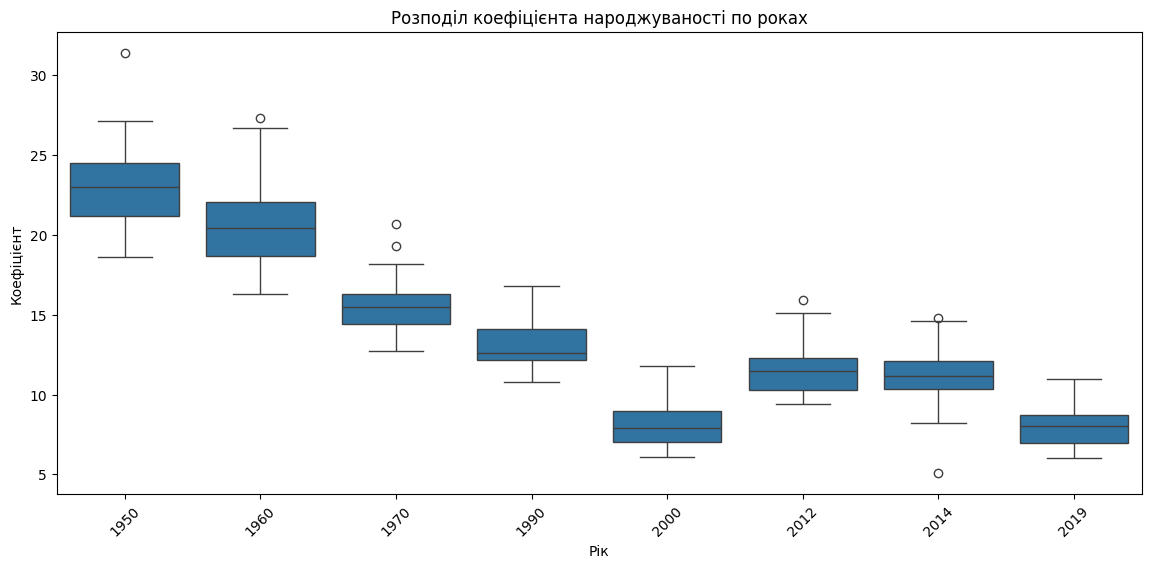

In [27]:
import seaborn as sns

# Перетворимо таблицю для boxplot
df_melt = df.melt(id_vars=df.columns[0], var_name='Рік', value_name='Коефіцієнт')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Рік', y='Коефіцієнт', data=df_melt)
plt.xticks(rotation=45)
plt.title("Розподіл коефіцієнта народжуваності по роках")
plt.show()

Boxplot — це діаграма, яка показує розподіл значень коефіцієнта народжуваності по всіх регіонах для кожного року.
На кожному «ящику» видно:

-медіану (середнє значення)

-нижній та верхній квартиль (25% і 75% значень)

-«вуса» (діапазон значень без викидів)

-можливі викиди (окремі точки)

Такий графік дозволяє швидко оцінити, як змінювався розподіл народжуваності між регіонами у різні роки — де більше розкид, де менше, де є екстремальні значення.

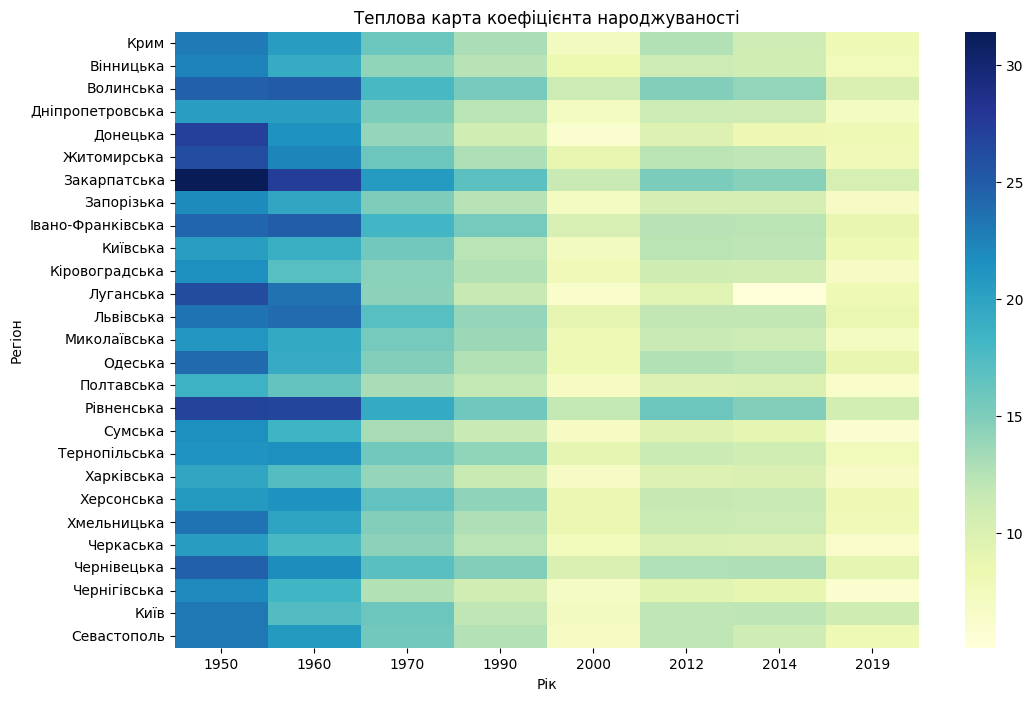

In [28]:
import seaborn as sns

heatmap_data = df.set_index(df.columns[0])
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Теплова карта коефіцієнта народжуваності")
plt.xlabel("Рік")
plt.ylabel("Регіон")
plt.show()


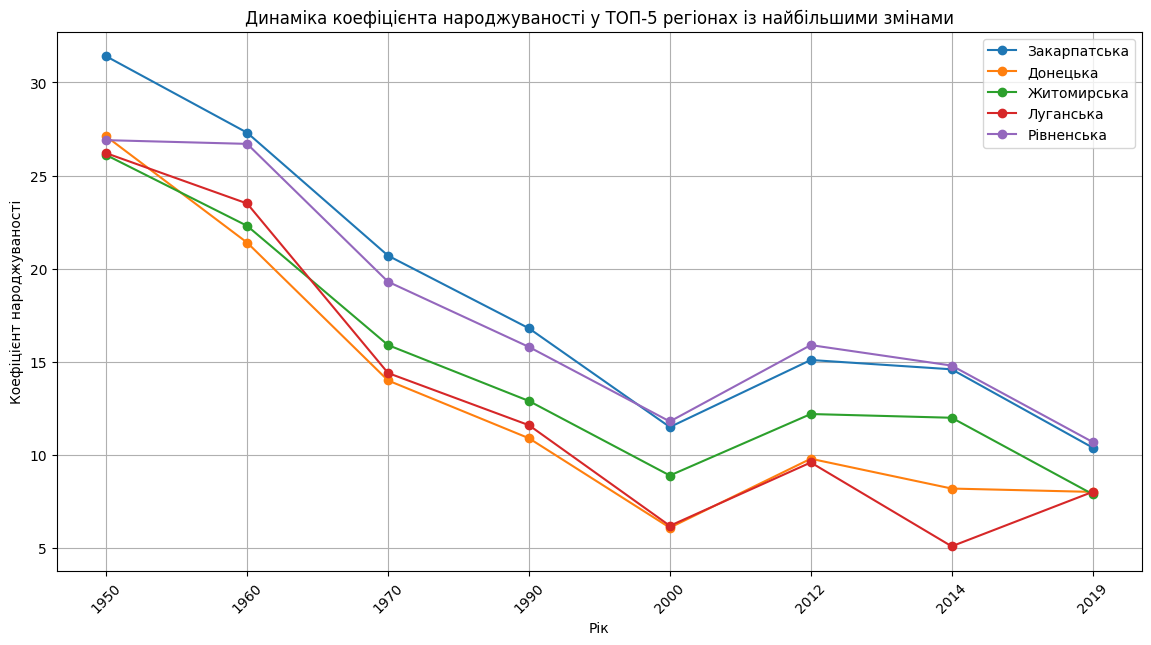

In [29]:
import matplotlib.pyplot as plt

# Рахуємо зміну: останній рік мінус перший рік
df['Зміна'] = df['2019'] - df['1950']

# ТОП-5 регіонів за зміною
top5 = df.reindex(df['Зміна'].abs().sort_values(ascending=False).index)[:5]

# Лінійний графік
plt.figure(figsize=(14, 7))
years = [col for col in df.columns if col not in [df.columns[0], 'Зміна']]

for row in top5.itertuples(index=False):
    plt.plot(years, row[1:-1], marker='o', label=row[0])

plt.title("Динаміка коефіцієнта народжуваності у ТОП-5 регіонах із найбільшими змінами")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


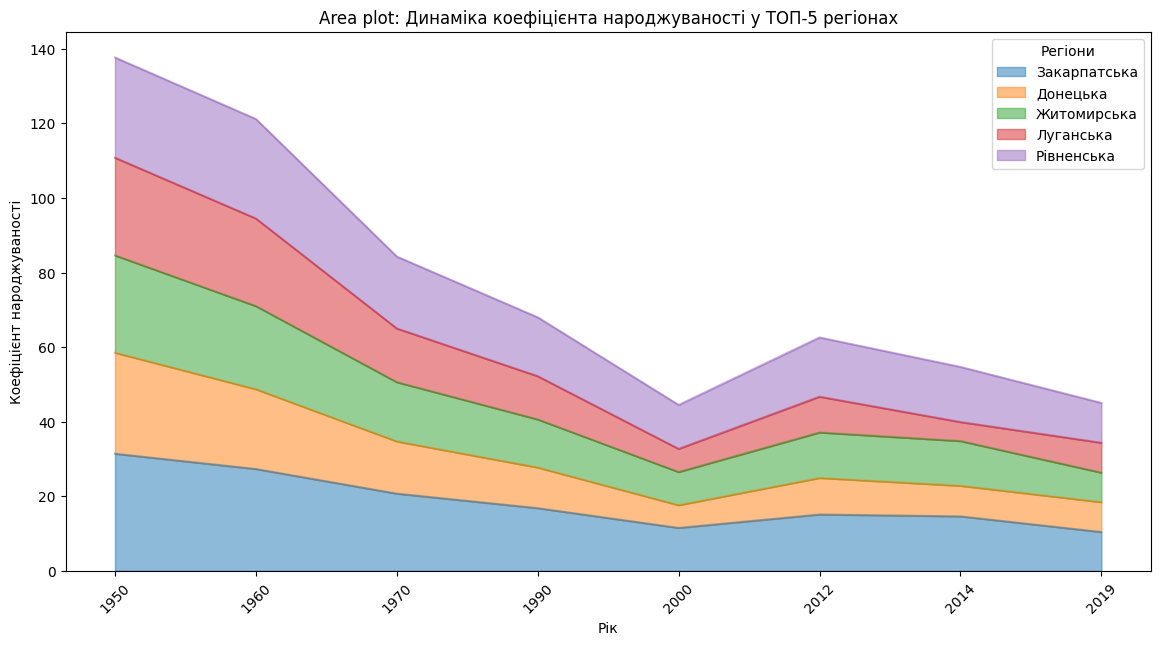

In [30]:
top5_data = top5.set_index(top5.columns[0])[years].T  # Транспонуємо для area plot

top5_data.plot(kind='area', figsize=(14, 7), alpha=0.5)
plt.title("Area plot: Динаміка коефіцієнта народжуваності у ТОП-5 регіонах")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.xticks(rotation=45)
plt.legend(title="Регіони")
plt.show()


Графік, який показує динаміку коефіцієнта народжуваності у часі для кількох регіонів одночасно.
На відміну від звичайного лінійного графіка, тут область під кривою зафарбована кольором.
Це допомагає одночасно бачити загальний тренд і структуру внеску кожного регіону.
Такий графік наочно демонструє, як змінювались показники у ТОП-5 регіонах з найбільшими змінами народжуваності з 1950 по 2019 рік.

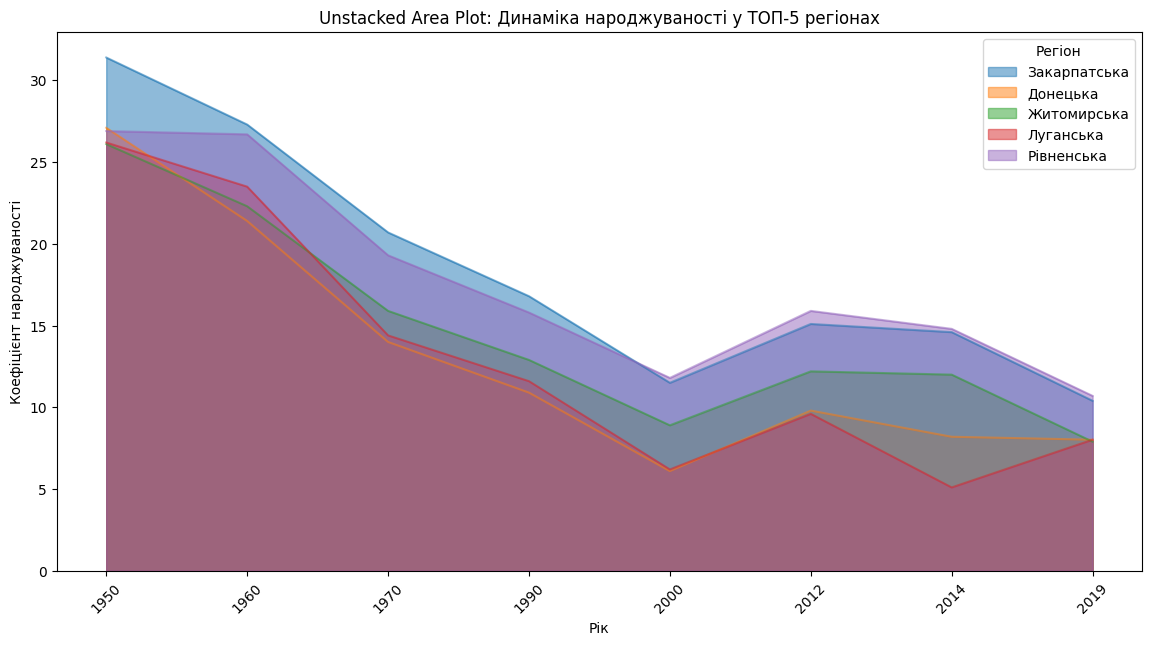

In [32]:
# Unstacked Area Plot
top5_data.plot(kind='area', figsize=(14, 7), stacked=False, alpha=0.5)
plt.title("Unstacked Area Plot: Динаміка народжуваності у ТОП-5 регіонах")
plt.xlabel("Рік")
plt.ylabel("Коефіцієнт народжуваності")
plt.xticks(rotation=45)
plt.legend(title="Регіон")
plt.show()
